In [1]:
import Style_transfer as st
import torch
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch.nn as nn
import pandas as pd


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%config Completer.use_jedi = False

In [2]:
def save_results_image(content_im, style_im, result_im, reconstruction, malign_probability, 
                       l1_score, rejected, tag_pair, save_location, content_weight = 1, iterations = 1):
    f, axarr = plt.subplots(1, 4)
    f.set_size_inches(18.5, 5)
    axarr[0].imshow(content_im[0][0].detach().cpu().numpy(),cmap = 'gray')
    axarr[0].set_title("Content Image")
    axarr[1].imshow(style_im[0][0].detach().cpu().numpy(),cmap = 'gray')
    axarr[1].set_title("Style Image")
    axarr[2].imshow(result_im[0][0].detach().cpu().numpy(),cmap = 'gray')
    axarr[2].set_title("Resulting Image")
    axarr[3].imshow(reconstruction[0][0].detach().cpu().numpy(), cmap = 'gray')
    axarr[3].set_title("Reconstructed Image")
    plt.suptitle('Mal. prob:' + str(malign_probability) + '   L1 loss: ' + str(np.round(l1_score,3)) 
                 + '   Rejected: ' + str(rejected) + 
                 '\nContent photo:' + tag_pair[0] + '   Style photo: ' + tag_pair[1] + 
                 '\n Parameters = Iterations: ' + str(iterations) + '   Content weight: ' + str(content_weight),                                   
                 fontsize = 12)
    plt.savefig(save_location)
    plt.show()

In [3]:
from AnomalyDetector import Model, L1_measure
from Style_transfer import image_loader, plot_image, load_image

In [4]:
base_iterations = 250
base_cnt_weight = 1
iterations_up = [300, 350, 400, 450, 500]
iterations_down = [200, 150, 100]
content_weights = [1,5,10,100, 200, 500, 1000]

# fixed test options
# fixed_opt_w = [5, 10, 25, 50, 100, 200, 500]
# fixed_opt_iter = [250, 250, 250, 250, 250, 250, 250]
#fixed_opt_w = [1, 5, 10, 5, 10, 250, 20]
#fixed_opt_iter = [500, 250, 250, 400, 400, 250, 750]
# test_opt_iter = [5,10,25,50,100, 250, 500, 1000]
fixed_opt_w = [1,5, 10, 25, 50]
fixed_opt_iter = [350, 250, 250, 250, 250]


In [5]:
# define the style transfer prerequisited
st_class = st.StyleTransfer()
base_malign_path = '/home/ryznerf/Computer_Vision/pytorch_data_input/test/malignant/'
base_benign_path = '/home/ryznerf/Computer_Vision/pytorch_data_input/test/benign/'

#base_malign_path = '/home/ryznerf/Computer_Vision/pytorch_data_input_limited/train/malignant/'
#base_benign_path = '/home/ryznerf/Computer_Vision/pytorch_data_input_limited/train/benign/'


save_folder = '/home/ryznerf/Computer_Vision/6.869_Computer_Vision_project/results_3/'

style = os.listdir(base_malign_path)
content = os.listdir(base_benign_path)

In [6]:
len(fixed_opt_w)

5

In [7]:
# define counts

random_pairs_count = 300
max_trials_per_pair = len(fixed_opt_w)
softmax_cutoff = 0.7
reconstruction_cut_off = 0.5

# randomly select pairings
np.random.seed(10)
style_tags = np.random.choice(style, random_pairs_count)
content_tags = np.random.choice(content, random_pairs_count)
cont_style_pairs = list(zip(content_tags, style_tags))

In [8]:
#load and define the anomaly detector
model_name = 'default_AE_mix3'   # model name
model = Model(n_channels= 1, bilinear= True) 
checkpoint = torch.load('/home/ryznerf/Computer_Vision/6.869_Computer_Vision_project/saved_classifiers/AutoEncoders/' + model_name) # save location
model.load_state_dict(checkpoint['state_dict']) # load the state
model = model.to(device) # put it to gpu

# load the classifier
classifier = torch.load('/home/ryznerf/Computer_Vision/6.869_Computer_Vision_project/saved_classifiers/model_full')
classifier = classifier.to(device)

In [109]:
#content[1850]

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the

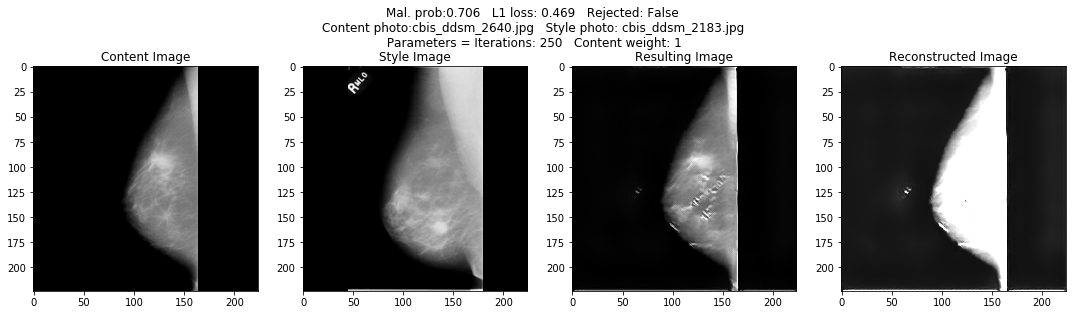

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model

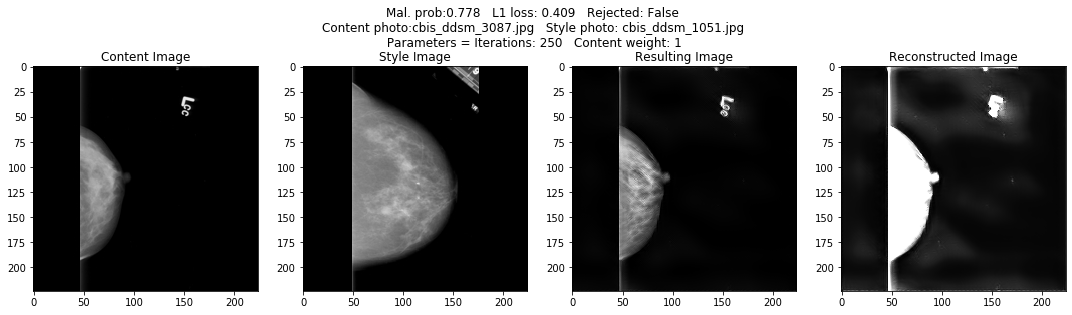

cuda
Building the style transfer model..
Optimizing..


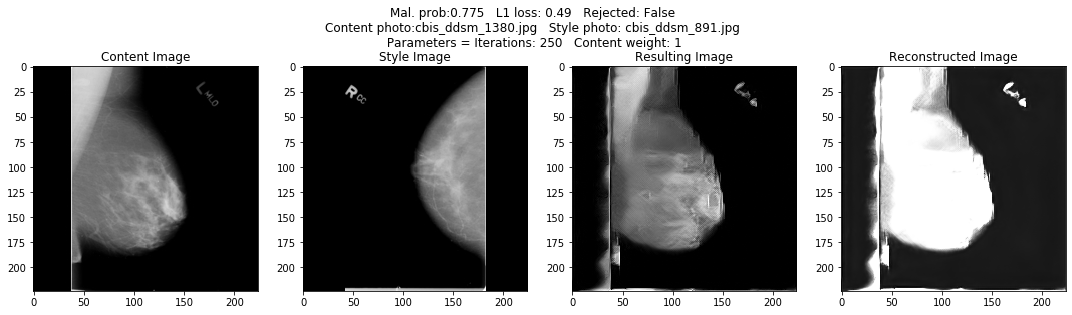

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style t

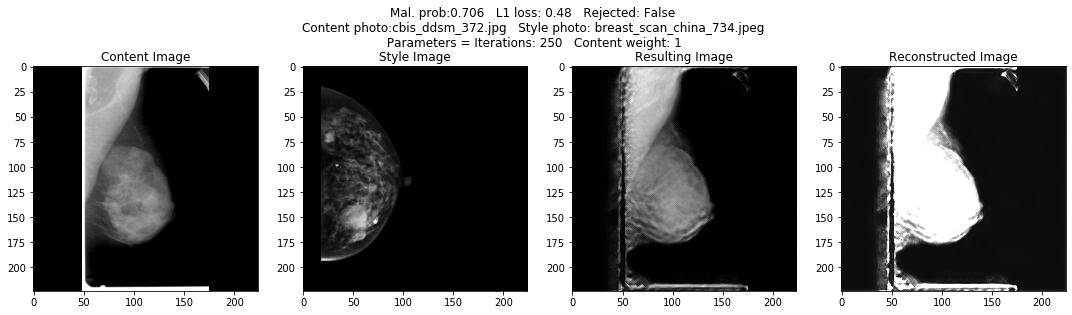

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer mo

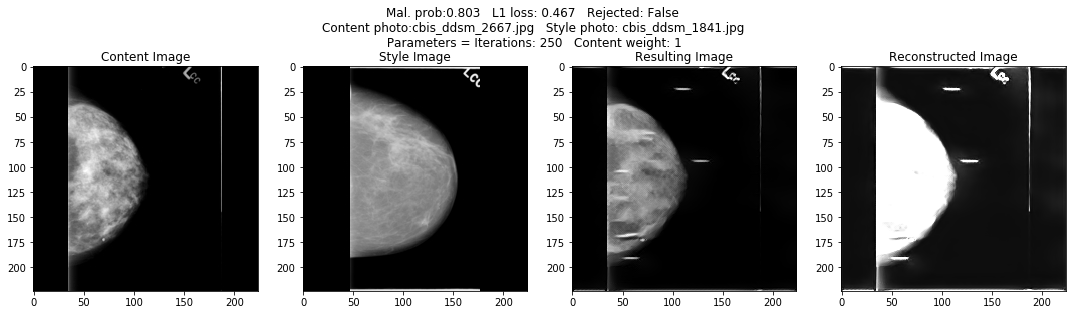

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..


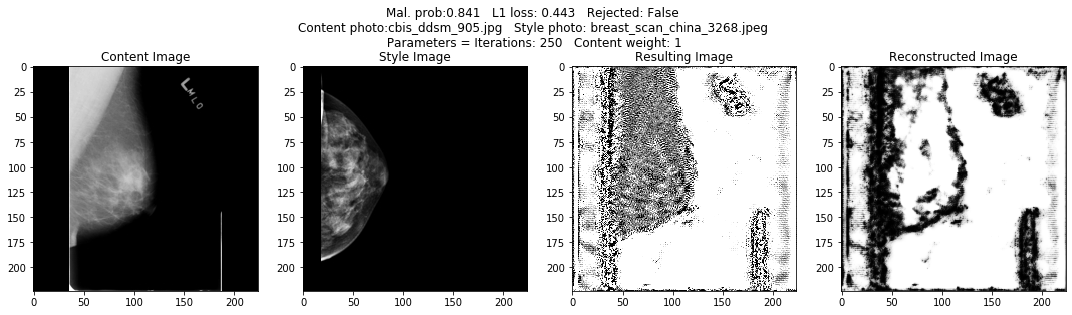

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cud

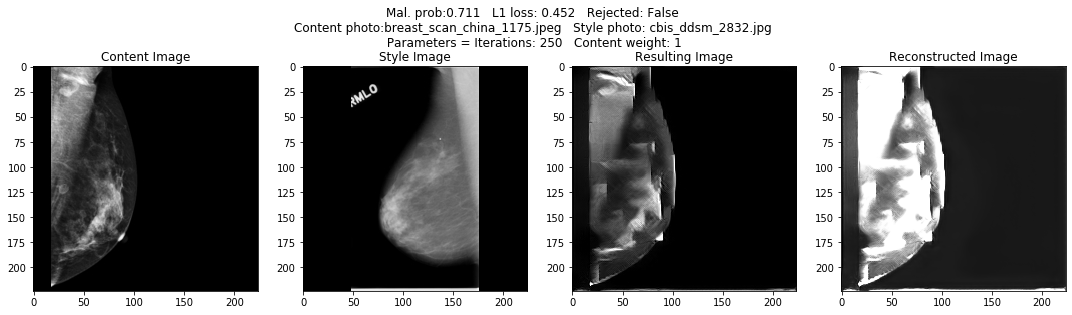

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..


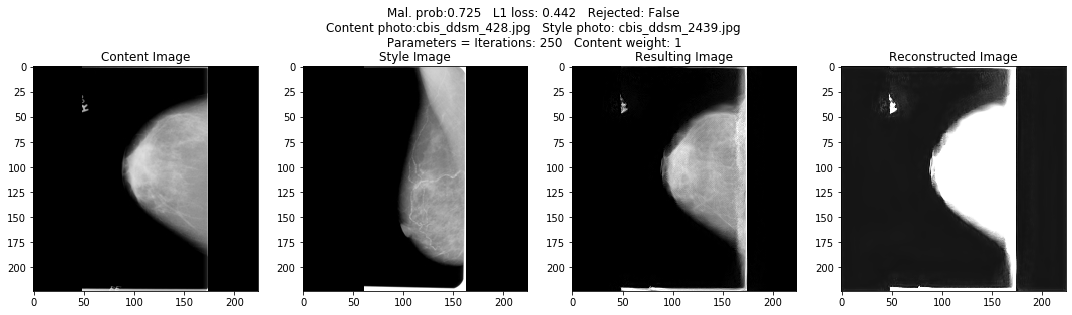

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transf

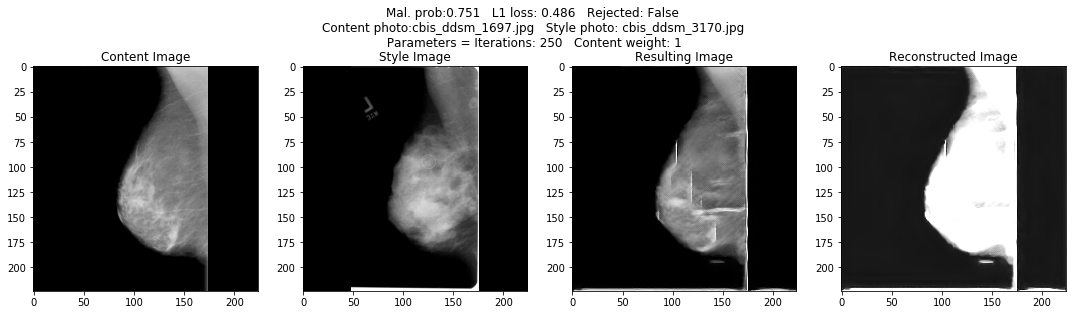

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Build

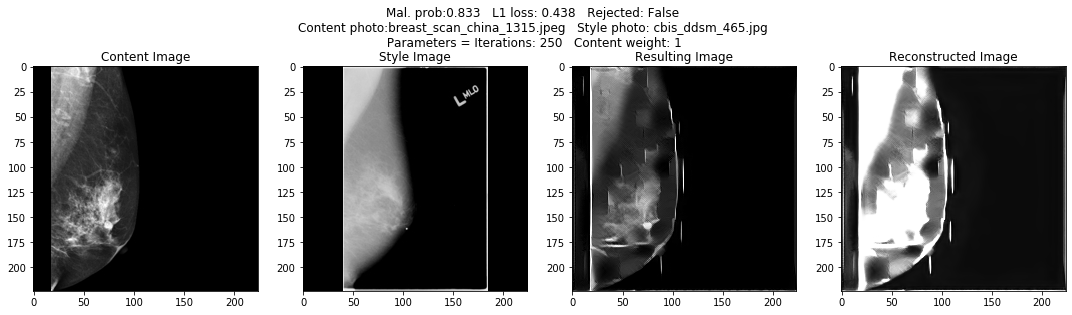

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..


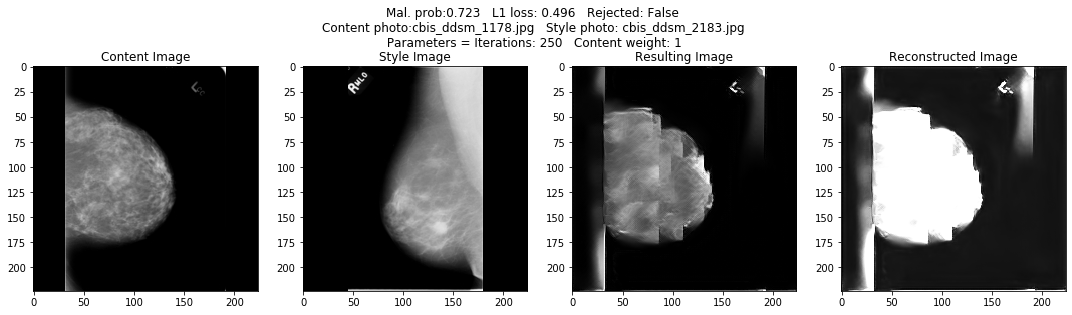

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..


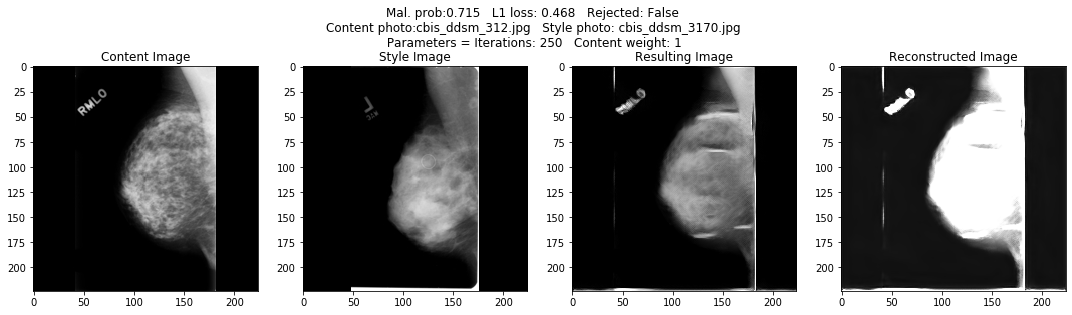

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer 

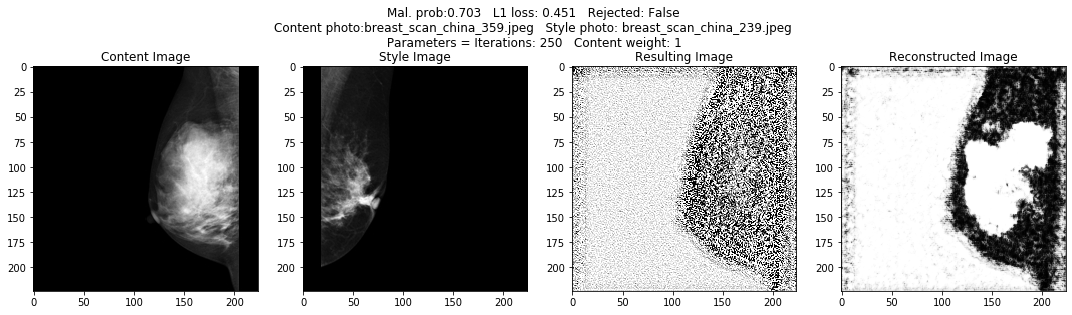

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building t

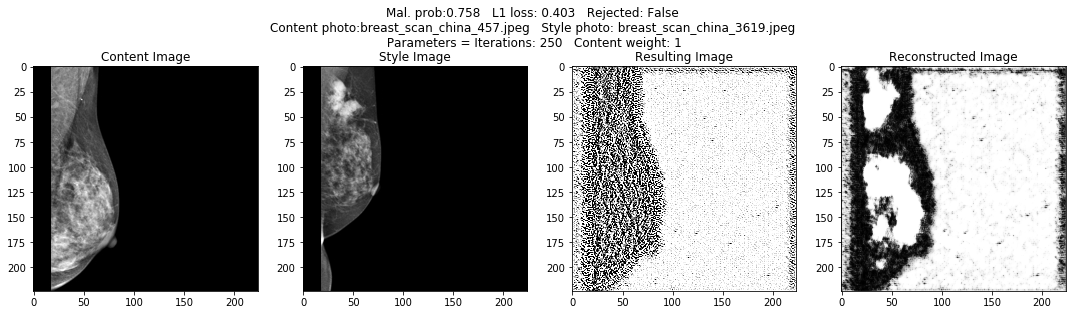

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Bu

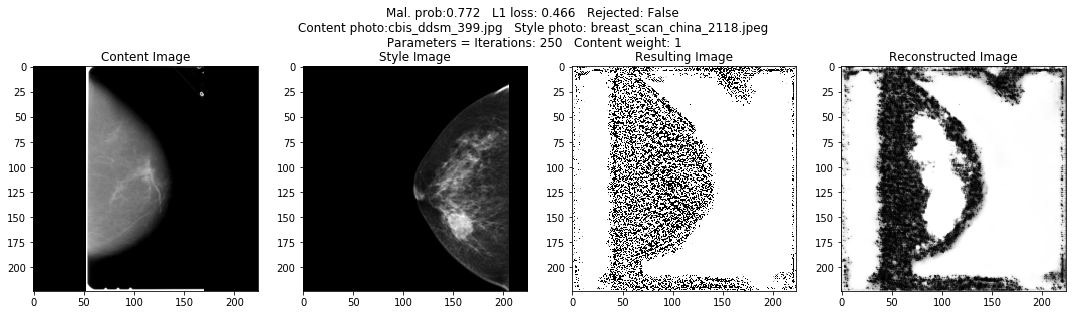

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style t

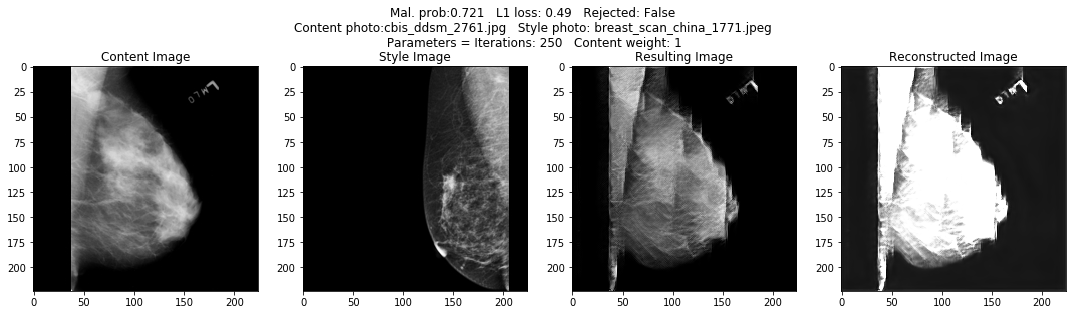

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the

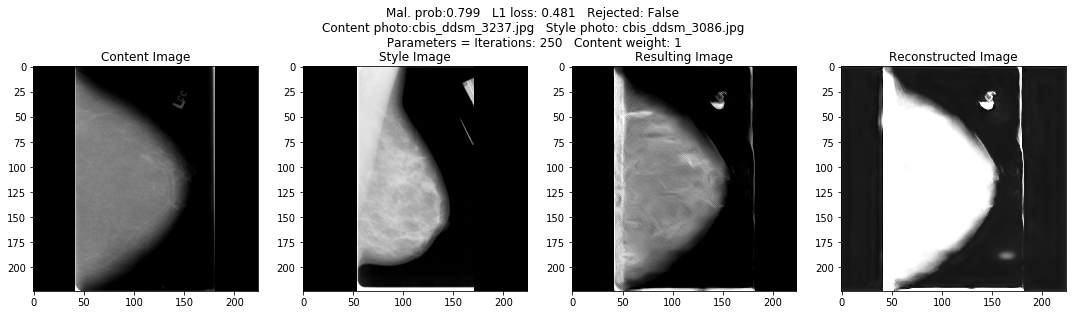

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the

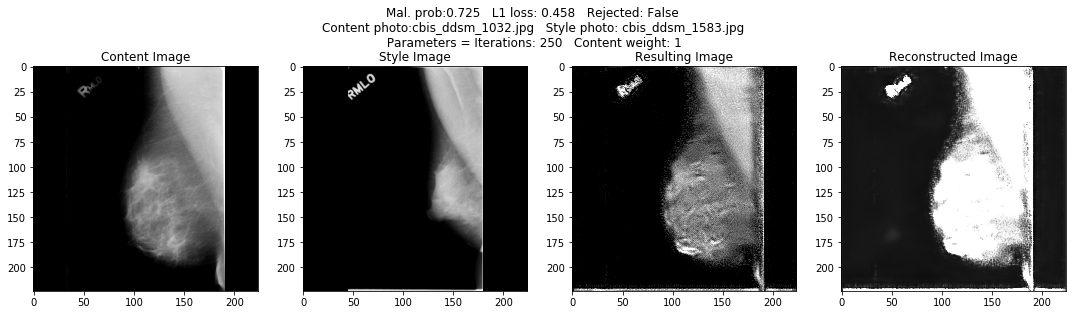

cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..

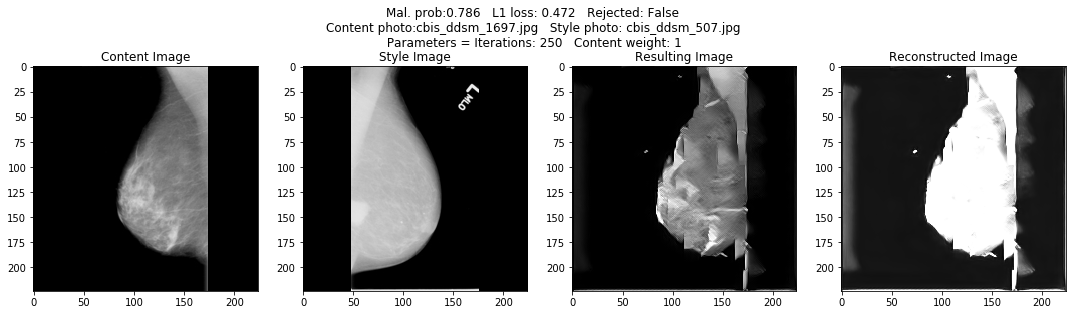

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Build

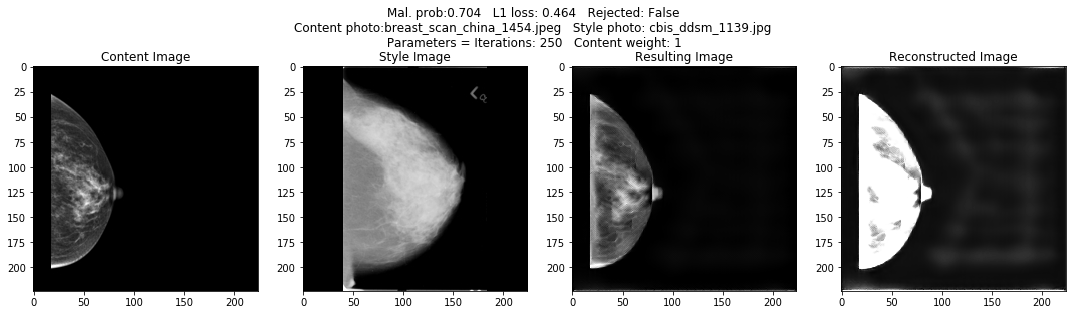

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softm

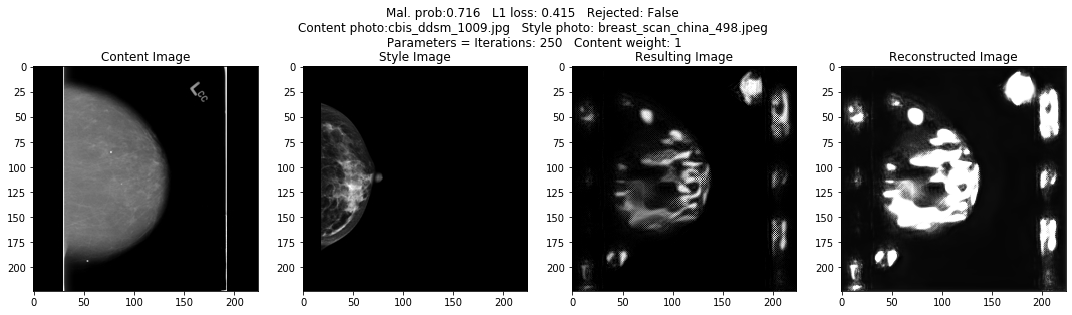

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transf

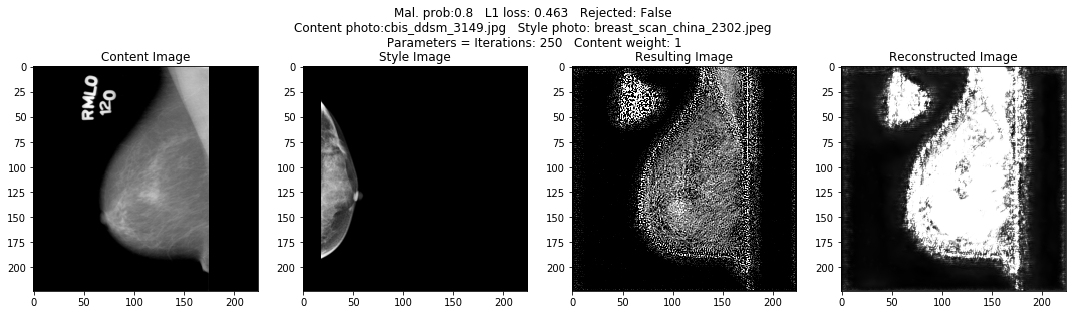

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building t

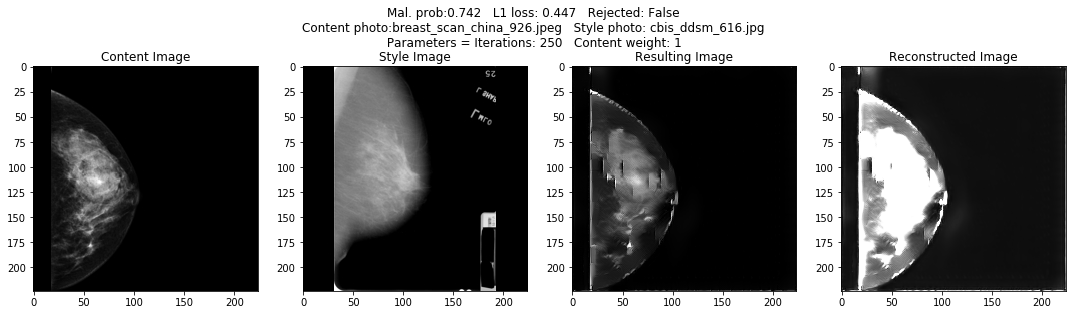

cuda
Building the style transfer model..
Optimizing..


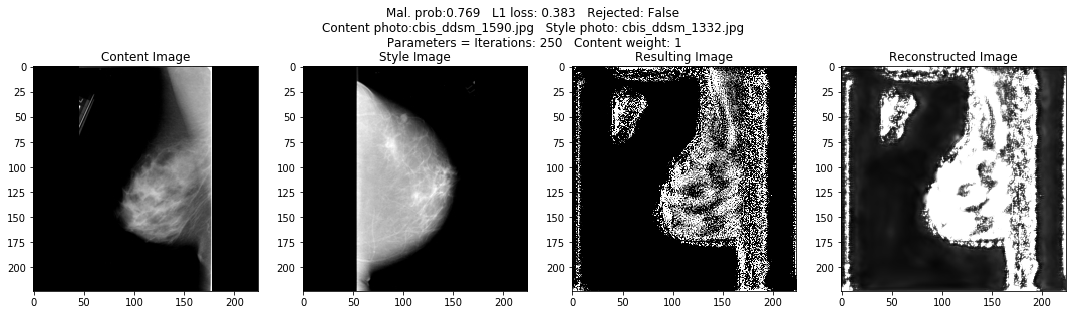

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on 

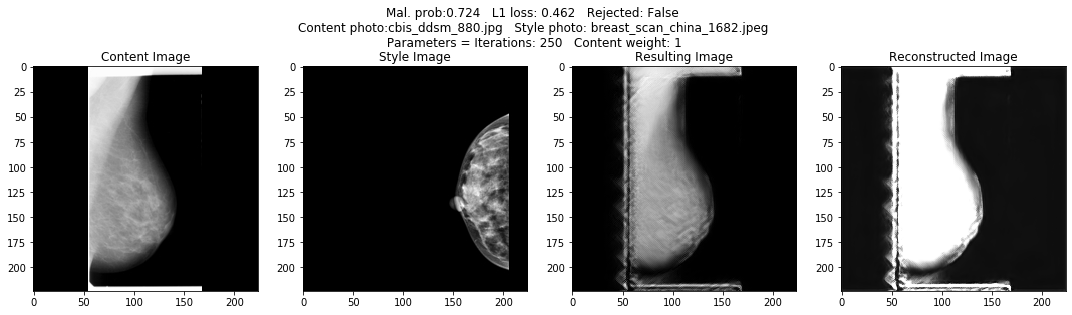

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on AE
cuda
Building the style transf

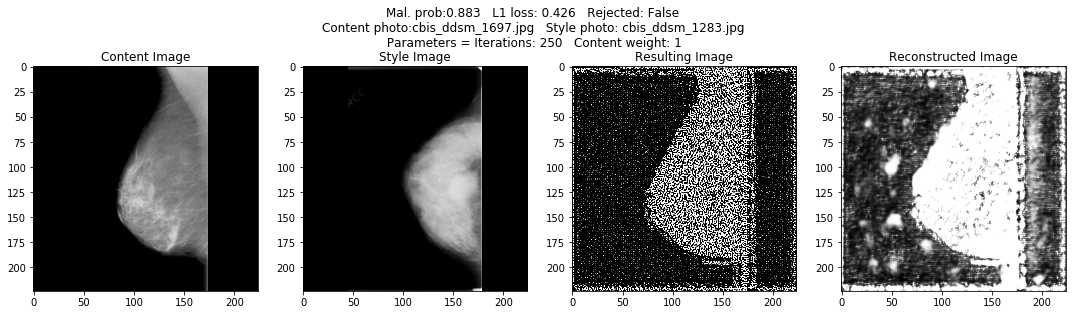

cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on Softmax
cuda
Building the style transfer model..
Optimizing..
Failed on 

In [ ]:
# results diction and its structure
#results_dict_structure = [run_id, im_cont, im_style, softmax, autoencoder, iters, weight]
results_dict = {}
total_number_of_runs = 0

for i in range(random_pairs_count):
    # set image pairs that will be used
    tag_pair = cont_style_pairs[i]
    style_im_path = base_malign_path + tag_pair[1]
    content_im_path = base_benign_path + tag_pair[0]
    
#     style_im_path = base_malign_path + style[1950]
#     content_im_path = base_benign_path + content[1900]
    # set initial parameters
    content_weight = 1
    num_steps = 250
    style_weight = 100000
    
    # set properties of the while loop
    run_generator = True
    rejected = True
    plot = True
    j = 0
    
    while run_generator:
        file_name = tag_pair[0][:-4] + '_' + tag_pair[1][:-4] + str(j) +'.jpg'
        save_location = save_folder + file_name
        result_im, content_im, style_im = st_class.style_transfer_apply(style_location=style_im_path, 
                                                        content_location=content_im_path, 
                                                        style_weight=style_weight,
                                                        num_steps=num_steps, 
                                                        content_weight = content_weight,
                                                        plot_loaded = False,
                                                        plot_result = False,
                                                        save_location = 'test_case.png')

        # autoencoder L1 difference
        reconstruction = model(result_im)
        l1_score = L1_measure(reconstruction, result_im)
        l1_score = l1_score.detach().cpu().numpy()[0]
        if l1_score > 0.5:
            plot = False
            print("Failed on AE")
        else:
            # run classifier on the image
            softmax = nn.Softmax(dim=1)
            res = np.round((softmax(classifier(result_im)).detach().cpu().numpy()),3)
            malign_probability = res[0][1]

            # decide if we accept
            if malign_probability >= softmax_cutoff:
                rejected = False
                run_generator = False
            else:
                plot = False
                print('Failed on Softmax')

        # plot the results
        if plot:
            save_results_image(content_im = content_im, 
               style_im = style_im, 
               result_im = result_im, 
               reconstruction = reconstruction, 
               malign_probability = malign_probability, 
               l1_score = l1_score, 
               rejected = rejected, 
               tag_pair = tag_pair, 
               save_location = save_location,
               iterations = num_steps, #num_steps
               content_weight = content_weight,) #content_weight)
        
        # append the combination to the results dictionary
        results_dict[total_number_of_runs] = [tag_pair[0], tag_pair[1], 
                                              malign_probability, l1_score, 
                                              num_steps, content_weight, rejected]
        total_number_of_runs += 1
        
        # decide if continue
        if j >= max_trials_per_pair:
            run_generator = False
        else:
            content_weight = fixed_opt_w[j]
            num_steps = fixed_opt_iter[j]
#             num_steps = test_opt_iter[j]
        
        j += 1

In [ ]:
df = pd.DataFrame.from_dict(results_dict).T
df.columns = ['content', 'style', 'softmax', 'AE_L1', 'iters', 'w_c', 'rejected']
df.head()

In [ ]:
df.to_csv('saved_results.csv')

In [ ]:
np.sum((df['rejected']== False).astype(int))

In [11]:
result_im.shape

torch.Size([1, 1, 224, 224])